#discriptive statistics and data visulization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["font.size"] = 12

In [4]:
#load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [
    # Mean values
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean',
    'symmetry_mean', 'fractal_dimension_mean',
    # Standard error values
    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
    'symmetry_se', 'fractal_dimension_se',
    # Worst values
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]

In [5]:
cancer_data = pd.read_csv(url,  names=column_names, na_values='?')

In [6]:
cancer_data.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
cancer_data.shape

(569, 32)

In [8]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
cancer_data.describe()

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
#check for missing values
cancer_data.isnull().sum()

,0
ID,0
Diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0


#measures of central tendency

In [11]:
numerical_features =['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

#function to display all measures of central tendency for a column
def central_tendency_stats(data, column):
  values = data[column]

  mean_val = values.mean()
  median_val = values.median()
  mode_val = values.mode()[0]

  if column != 'radius_mean':
    weights = data['radius_mean']
    weighted_mean = np.average(values, weights=weights)
  else:
    weighted_mean = np.average(values, weights=data['area_mean'])

  #display results

  print(f"Statistics for {column}:")
  print(f"Mean: {mean_val:.4f}")
  print(f"Median: {median_val:.4f}")
  print(f"Mode: {mode_val:.4f}")
  print(f"Weighted Mean: {weighted_mean:.4f}")

  #Visual representation of mean, median and mode
  plt.figure(figsize=(10, 6))
  sns.histplot(values, kde=True)
  plt.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
  plt.axvline(median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
  plt.axvline(mode_val, color='b', linestyle=':', label=f'Mode: {mode_val:.2f}')
  plt.title(f'Distribution of {column} with Central Tendency Measures')
  plt.legend()
  plt.show()

  #Interpretation
  print("\ninterpretaion:")
  if abs(mean_val - median_val) < 0.01 * abs(mean_val):
    print("The mean and median are very close, suggesting a relatively symmetric distribution.")

  elif mean_val > median_val:
    print("The mean is greater than the median, indicating a positively skewed distribution.")

  else:
    print("The mean is less than the median, indicating a negatively skewed distribution.")

  if abs(mode_val - median_val) < 0.01 * abs(median_val):
    print("The mode is close to the median, which is typical in many distributions.")
  print("\n")

Statistics for radius_mean:
Mean: 14.1273
Median: 13.3700
Mode: 12.3400
Weighted Mean: 15.9938


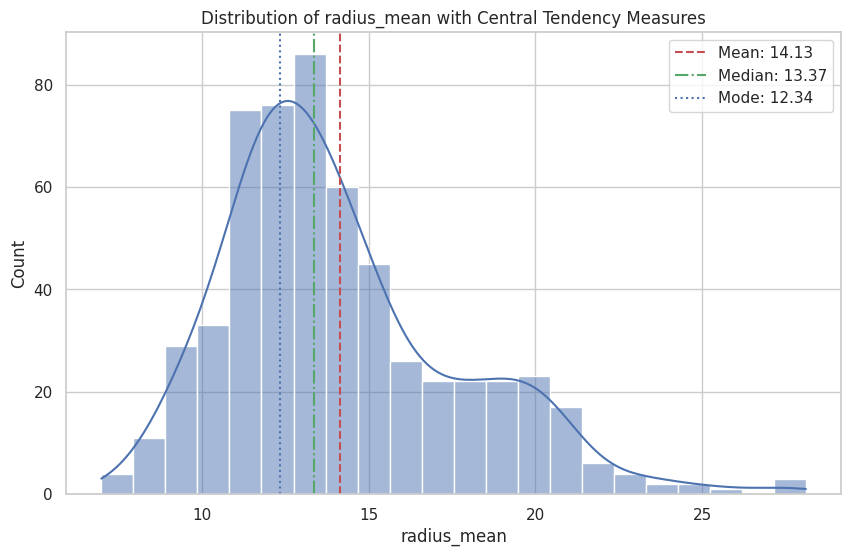


interpretaion:
The mean is greater than the median, indicating a positively skewed distribution.


Statistics for texture_mean:
Mean: 19.2896
Median: 18.8400
Mode: 14.9300
Weighted Mean: 19.6364


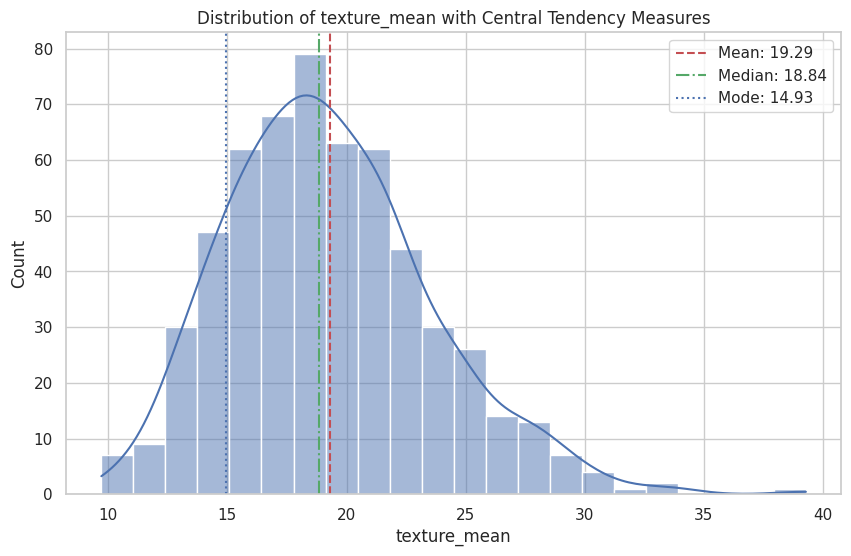


interpretaion:
The mean is greater than the median, indicating a positively skewed distribution.


Statistics for perimeter_mean:
Mean: 91.9690
Median: 86.2400
Mode: 82.6100
Weighted Mean: 98.0068


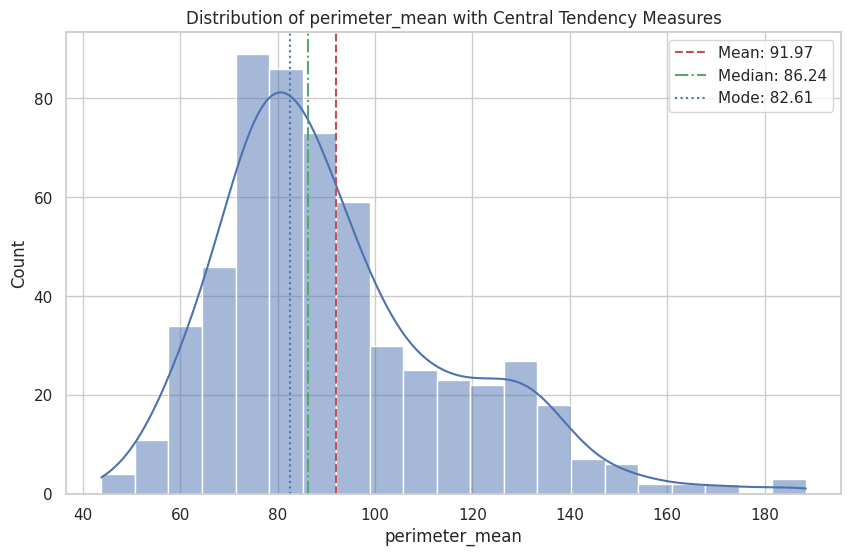


interpretaion:
The mean is greater than the median, indicating a positively skewed distribution.


Statistics for area_mean:
Mean: 654.8891
Median: 551.1000
Mode: 512.2000
Weighted Mean: 741.4118


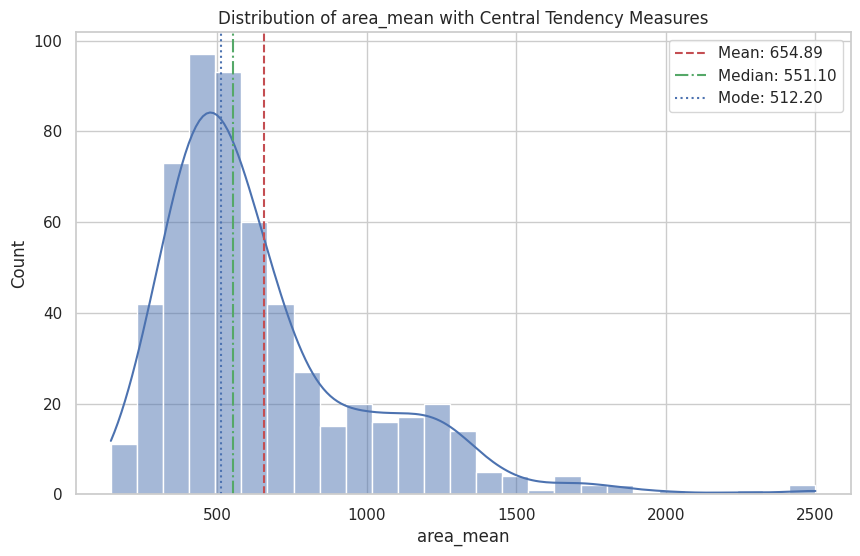


interpretaion:
The mean is greater than the median, indicating a positively skewed distribution.


Statistics for smoothness_mean:
Mean: 0.0964
Median: 0.0959
Mode: 0.1007
Weighted Mean: 0.0970


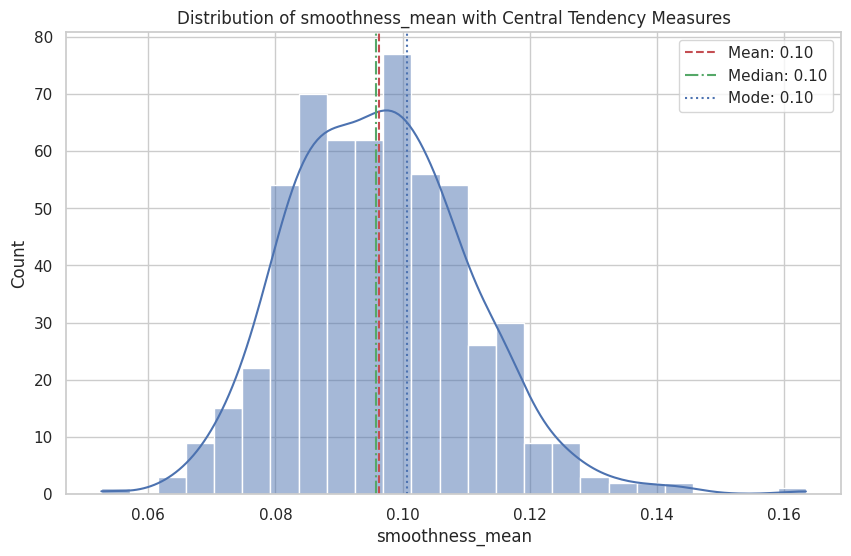


interpretaion:
The mean and median are very close, suggesting a relatively symmetric distribution.




In [12]:
#apply for function
for feature in numerical_features:
    central_tendency_stats(cancer_data, feature)


#malignant vs bengin

<Figure size 1200x600 with 0 Axes>

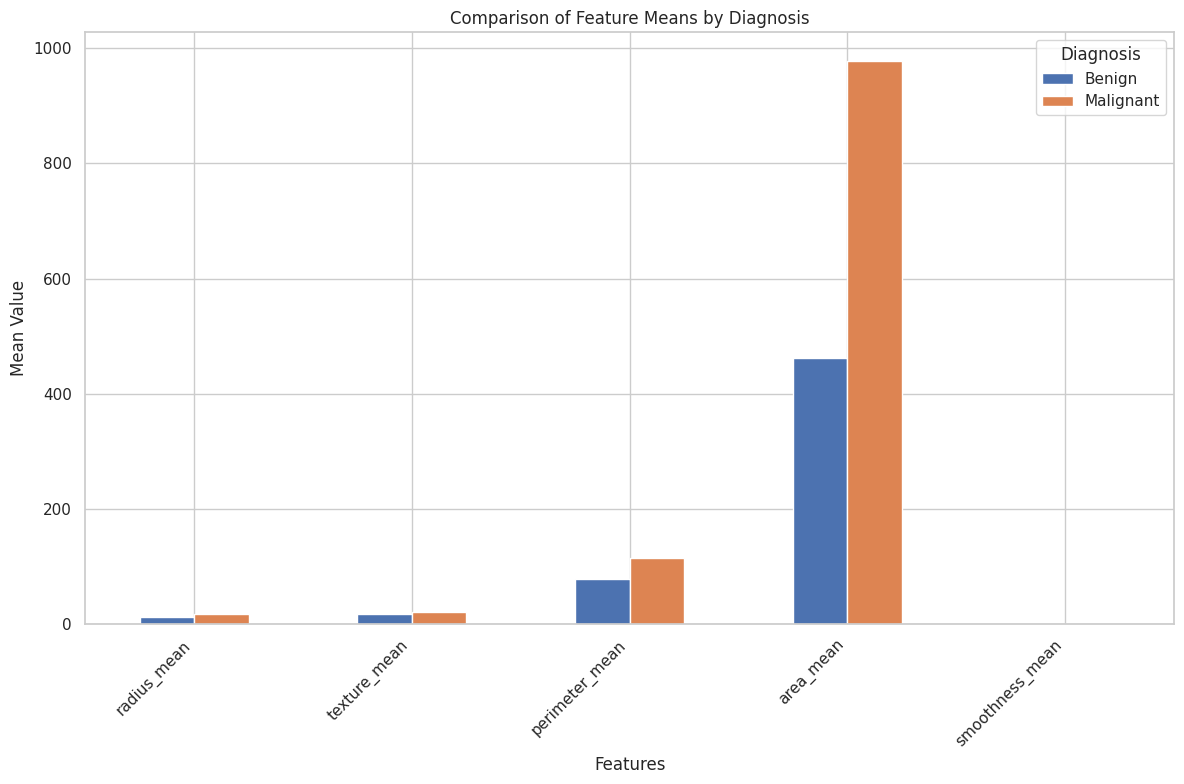

Mean values by diagnosis group:
                  radius_mean  texture_mean  perimeter_mean   area_mean  \
Diagnosis_Binary                                                          
Benign              12.146524     17.914762       78.075406  462.790196   
Malignant           17.462830     21.604906      115.365377  978.376415   

                  smoothness_mean  
Diagnosis_Binary                   
Benign                   0.092478  
Malignant                0.102898  

Observation: Note the differences in mean values between benign and malignant tumors.
These differences might be statistically significant and useful for classification.


In [13]:
# Create a comparison plot of means for malignant vs benign tumors
def compare_means_by_diagnosis(data, features):
    """Compare means of features between malignant and benign tumors."""
    # Convert diagnosis to binary (M = Malignant, B = Benign)
    data['Diagnosis_Binary'] = data['Diagnosis'].map({'M': 'Malignant', 'B': 'Benign'})

    # Calculate means by diagnosis
    grouped_means = data.groupby('Diagnosis_Binary')[features].mean()

    # Plot
    plt.figure(figsize=(12, 6))
    grouped_means.T.plot(kind='bar', rot=45)
    plt.title('Comparison of Feature Means by Diagnosis')
    plt.ylabel('Mean Value')
    plt.xlabel('Features')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend(title='Diagnosis')
    plt.show()

    # Return the grouped means for further analysis
    return grouped_means

# Compare means for selected features
group_means = compare_means_by_diagnosis(cancer_data, numerical_features)
print("Mean values by diagnosis group:")
print(group_means)
print("\nObservation: Note the differences in mean values between benign and malignant tumors.")
print("These differences might be statistically significant and useful for classification.")

#dispersion measure

In [18]:
def dispersion_stats(data, column):
  values = data[column]

  #claculate differents measures
  range_val = values.max() - values.min()
  variance =values.var()
  std_dev = values.std()

  #calculte Q1, Q3, IQR
  q1 = values.quantile(0.25)
  q3 = values.quantile(0.75)
  iqr = q3 - q1

  #claculate coefficient of variation cv
  cv = (std_dev / values.mean()) * 100

  #display results
  print(f"Dispersion Statistics for {column}:")
  print(f"Range: {range_val:.4f}")
  print(f"Variance: {variance:.4f}")
  print(f"Standard Deviation: {std_dev:.4f}")
  print(f"Interquartile Range (IQR): {iqr:.4f}")
  print(f"Coefficient of Variation (CV): {cv:.4f}%")

  #Visual representation of dispersion
  plt.figure(figsize=(14, 6))
  #create 2 subplot
  plt.subplot(1, 2, 1)
  sns.boxplot(y=values)
  plt.title(f'Boxplot of {column}')
  plt.ylabel('value')

  plt.subplot(1, 2, 2)
  sns.histplot(values, kde=True)
  plt.axvline(values.mean(), color='r', linestyle='--',label=f'Mean: {values.mean():.2f}')
  plt.axvline(values.mean() + std_dev, color='g', linestyle='-.',label=f'Mean + SD: {values.mean() + std_dev:.2f}')
  plt.axvline(values.mean() - std_dev, color='g', linestyle='-.',label=f'Mean - SD: {values.mean() - std_dev:.2f}')
  plt.title(f'Distribution of {column} with Standard Deviation')
  plt.legend()

  plt.tight_layout()
  plt.show()

  #Explanation
  print("\nInterpretation:")
  print(f"Range: The difference between the maximum and minimum values is {range_val:.4f}.")
  print(f"Standard Deviation: On average, values deviate from the mean by approximately {std_dev:.4f}.")
  print(f"IQR: The middle 50% of the data falls within a range of {iqr:.4f}.")

  # Interpretation of Coefficient of Variation
  if cv < 10:
    print("Coefficient of Variation: The data shows low variability relative to the mean.")
  elif cv < 30:
    print("Coefficient of Variation: The data shows moderate variability relative to the mean.")
  else:
    print("Coefficient of Variation: The data shows high variability relative to the mean.")
  print("\n")

Dispersion Statistics for radius_mean:
Range: 21.1290
Variance: 12.4189
Standard Deviation: 3.5240
Interquartile Range (IQR): 4.0800
Coefficient of Variation (CV): 24.9450%


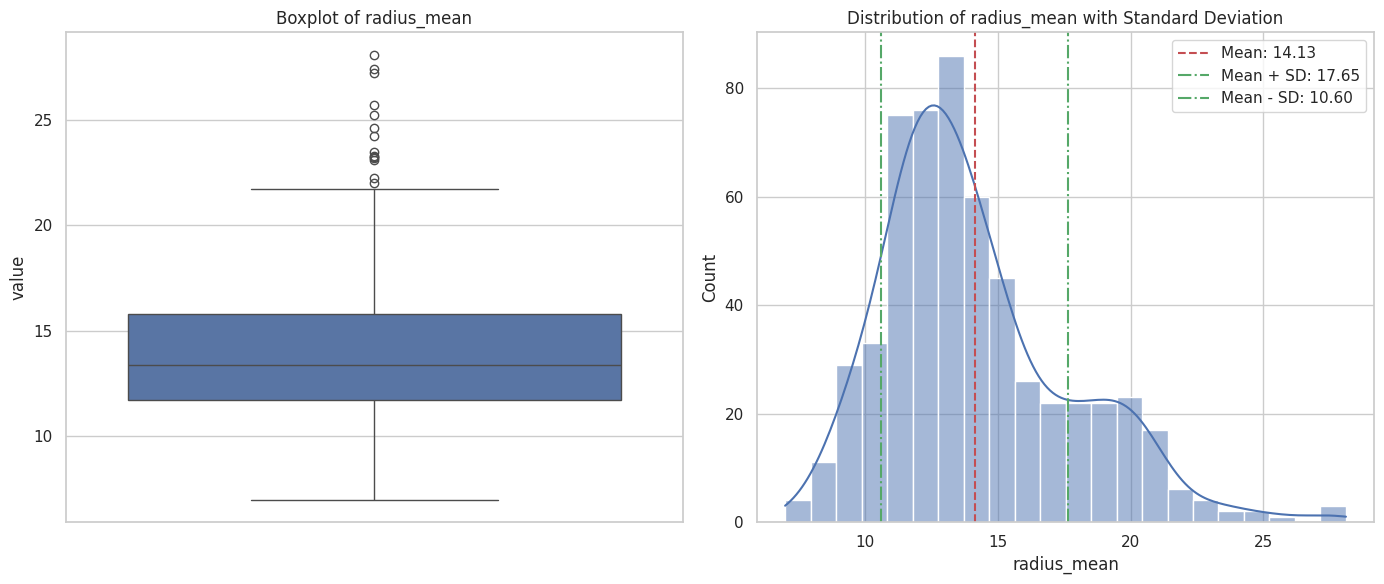


Interpretation:
Range: The difference between the maximum and minimum values is 21.1290.
Standard Deviation: On average, values deviate from the mean by approximately 3.5240.
IQR: The middle 50% of the data falls within a range of 4.0800.
Coefficient of Variation: The data shows moderate variability relative to the mean.


Dispersion Statistics for texture_mean:
Range: 29.5700
Variance: 18.4989
Standard Deviation: 4.3010
Interquartile Range (IQR): 5.6300
Coefficient of Variation (CV): 22.2971%


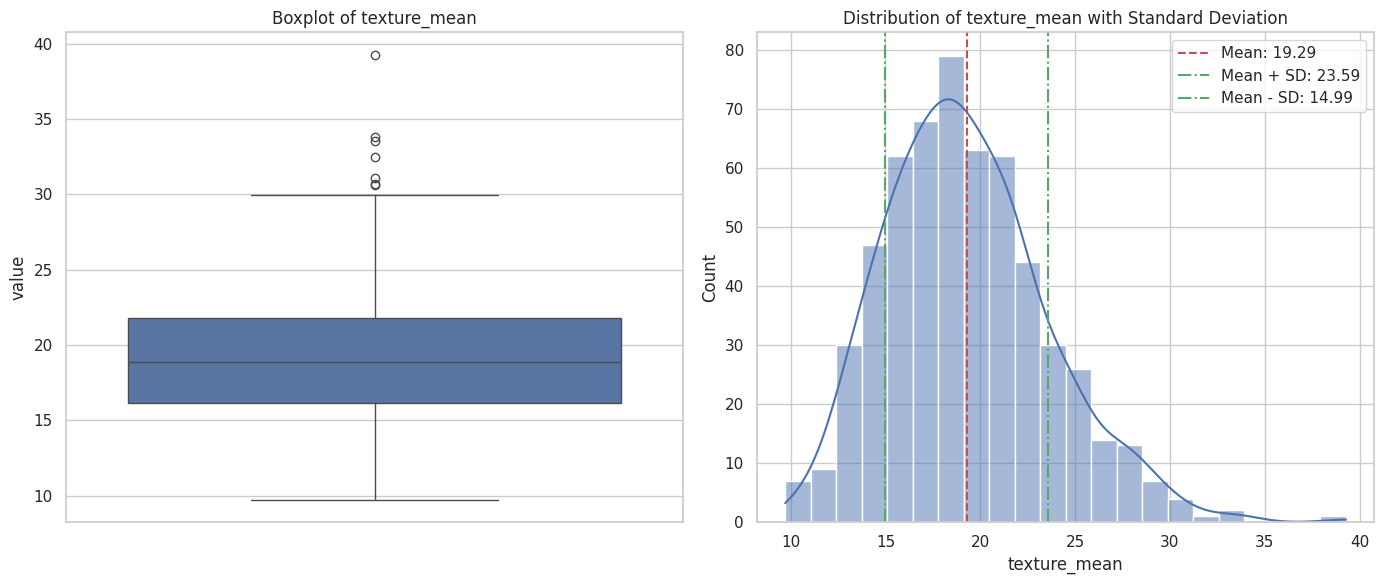


Interpretation:
Range: The difference between the maximum and minimum values is 29.5700.
Standard Deviation: On average, values deviate from the mean by approximately 4.3010.
IQR: The middle 50% of the data falls within a range of 5.6300.
Coefficient of Variation: The data shows moderate variability relative to the mean.


Dispersion Statistics for perimeter_mean:
Range: 144.7100
Variance: 590.4405
Standard Deviation: 24.2990
Interquartile Range (IQR): 28.9300
Coefficient of Variation (CV): 26.4208%


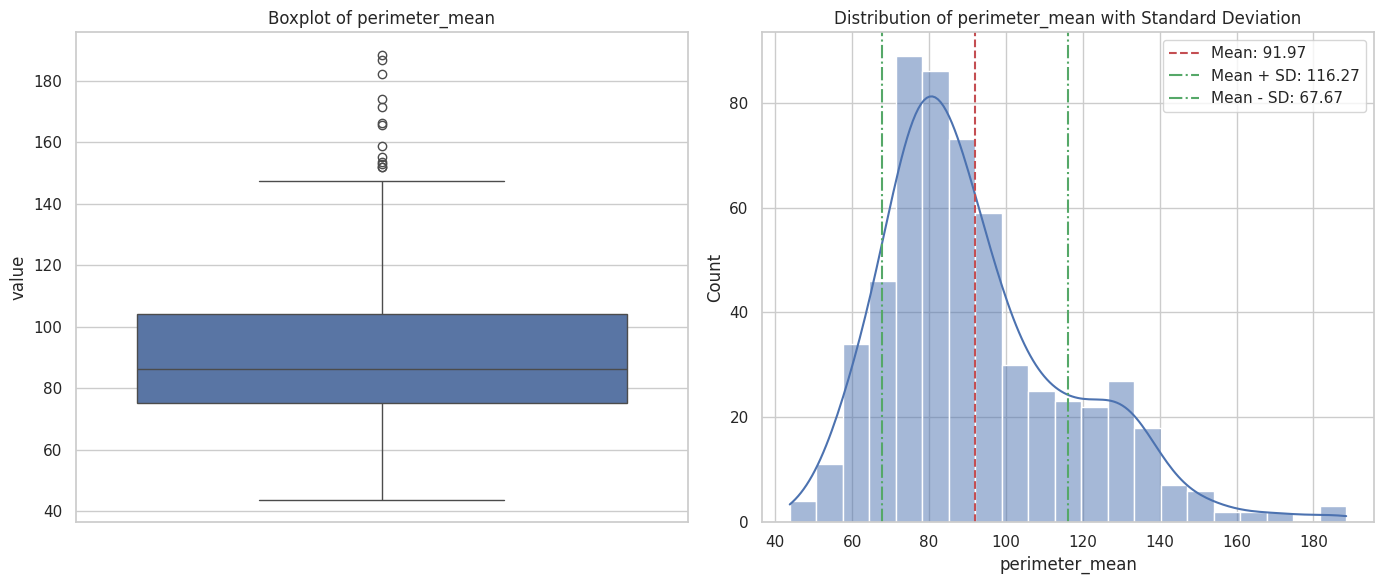


Interpretation:
Range: The difference between the maximum and minimum values is 144.7100.
Standard Deviation: On average, values deviate from the mean by approximately 24.2990.
IQR: The middle 50% of the data falls within a range of 28.9300.
Coefficient of Variation: The data shows moderate variability relative to the mean.


Dispersion Statistics for area_mean:
Range: 2357.5000
Variance: 123843.5543
Standard Deviation: 351.9141
Interquartile Range (IQR): 362.4000
Coefficient of Variation (CV): 53.7364%


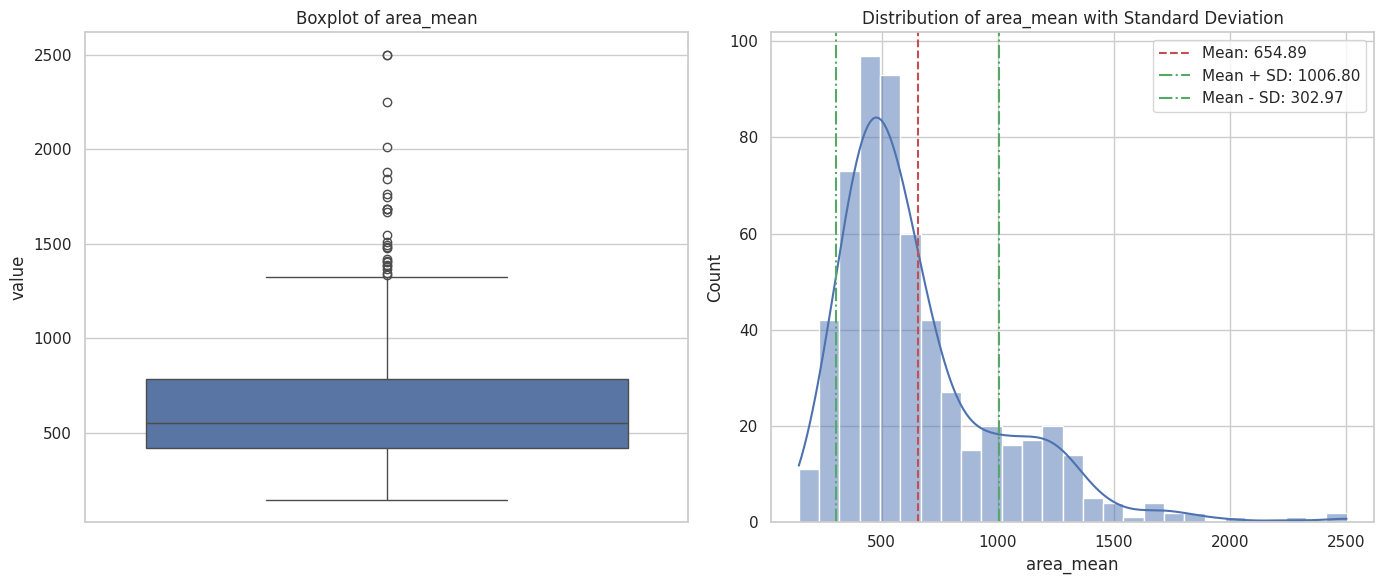


Interpretation:
Range: The difference between the maximum and minimum values is 2357.5000.
Standard Deviation: On average, values deviate from the mean by approximately 351.9141.
IQR: The middle 50% of the data falls within a range of 362.4000.
Coefficient of Variation: The data shows high variability relative to the mean.


Dispersion Statistics for smoothness_mean:
Range: 0.1108
Variance: 0.0002
Standard Deviation: 0.0141
Interquartile Range (IQR): 0.0189
Coefficient of Variation (CV): 14.5954%


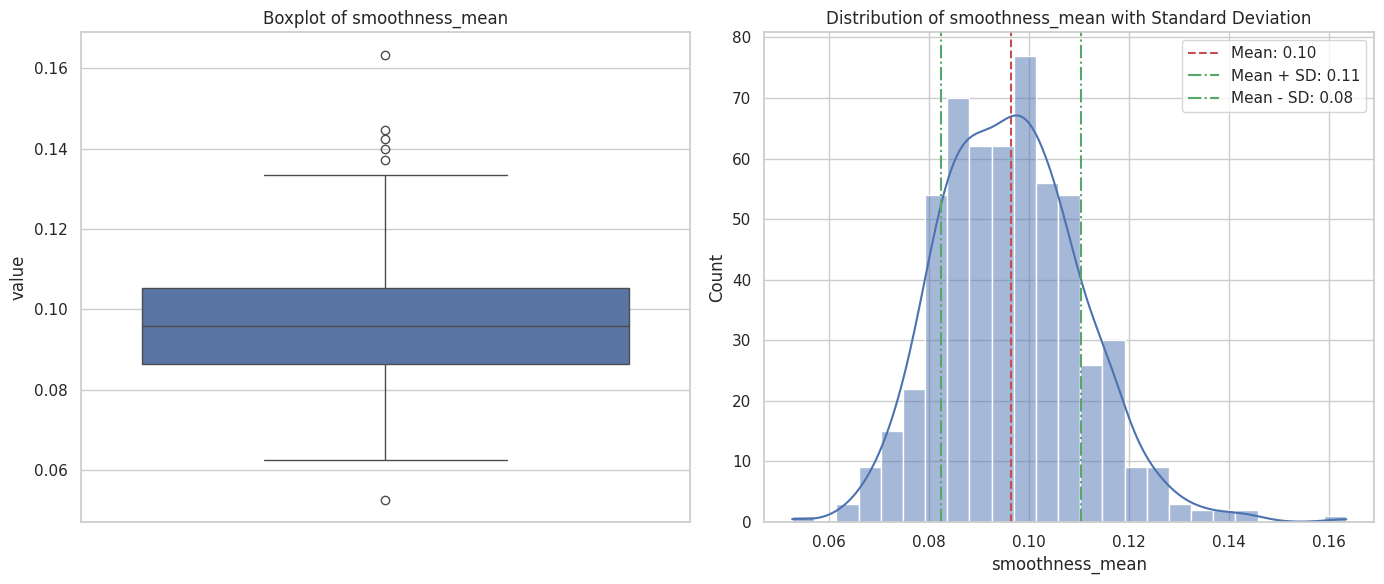


Interpretation:
Range: The difference between the maximum and minimum values is 0.1108.
Standard Deviation: On average, values deviate from the mean by approximately 0.0141.
IQR: The middle 50% of the data falls within a range of 0.0189.
Coefficient of Variation: The data shows moderate variability relative to the mean.




In [19]:
for feature in numerical_features:
    dispersion_stats(cancer_data, feature)

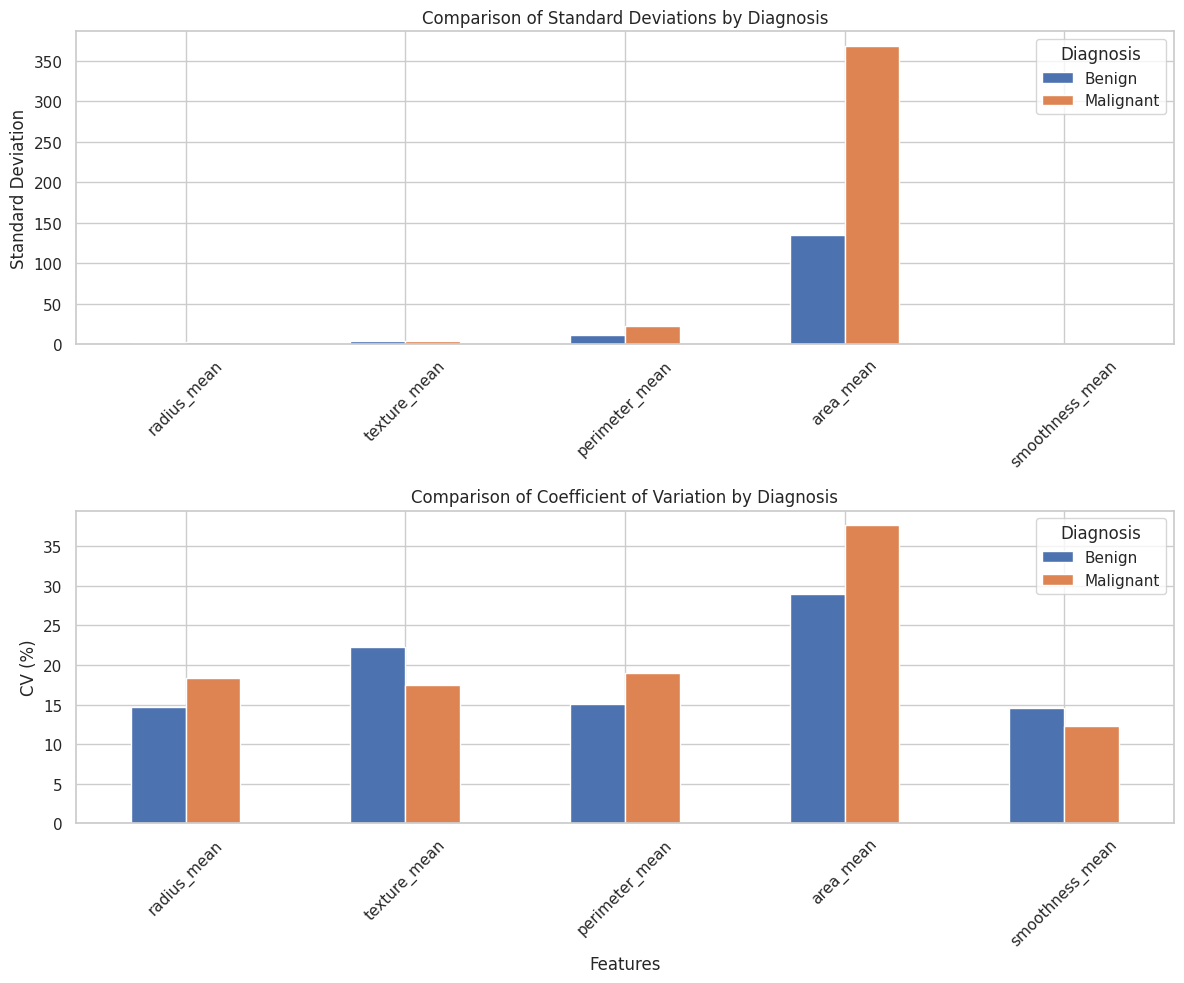

Standard deviation values by diagnosis group:
                  radius_mean  texture_mean  perimeter_mean   area_mean  \
Diagnosis_Binary                                                          
Benign               1.780512      3.995125       11.807438  134.287118   
Malignant            3.203971      3.779470       21.854653  367.937978   

                  smoothness_mean  
Diagnosis_Binary                   
Benign                   0.013446  
Malignant                0.012608  

Coefficient of Variation values by diagnosis group:
                  radius_mean  texture_mean  perimeter_mean  area_mean  \
Diagnosis_Binary                                                         
Benign              14.658611     22.300741       15.123120  29.016846   
Malignant           18.347376     17.493573       18.943858  37.606996   

                  smoothness_mean  
Diagnosis_Binary                   
Benign                  14.539813  
Malignant               12.253081  

Observation: N

In [20]:
# Compare dispersion by diagnosis
def compare_dispersion_by_diagnosis(data, features):
    """Compare dispersion measures between malignant and benign tumors."""
    # Convert diagnosis to binary
    data['Diagnosis_Binary'] = data['Diagnosis'].map({'M': 'Malignant', 'B': 'Benign'})

    # Calculate standard deviations by diagnosis
    grouped_std = data.groupby('Diagnosis_Binary')[features].std()

    # Calculate coefficient of variation
    grouped_mean = data.groupby('Diagnosis_Binary')[features].mean()
    grouped_cv = (grouped_std / grouped_mean) * 100

    # Plot standard deviations
    # Plot standard deviations and CV on separate subplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

    grouped_std.T.plot(kind='bar', rot=45, ax=axes[0])
    axes[0].set_title('Comparison of Standard Deviations by Diagnosis')
    axes[0].set_ylabel('Standard Deviation')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].legend(title='Diagnosis')

    grouped_cv.T.plot(kind='bar', rot=45, ax=axes[1])
    axes[1].set_title('Comparison of Coefficient of Variation by Diagnosis')
    axes[1].set_ylabel('CV (%)')
    axes[1].set_xlabel('Features')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].legend(title='Diagnosis')

    plt.tight_layout()
    plt.show()

    # Return the grouped stats for further analysis
    return grouped_std, grouped_cv

# Compare dispersion for selected features
group_std, group_cv = compare_dispersion_by_diagnosis(cancer_data, numerical_features)
print("Standard deviation values by diagnosis group:")
print(group_std)
print("\nCoefficient of Variation values by diagnosis group:")
print(group_cv)
print("\nObservation: Notice how variability differs between benign and malignant tumors.")
print("Higher variability in one group might indicate less predictable or more diverse cellular characteristics.")

#Advanced data visualization


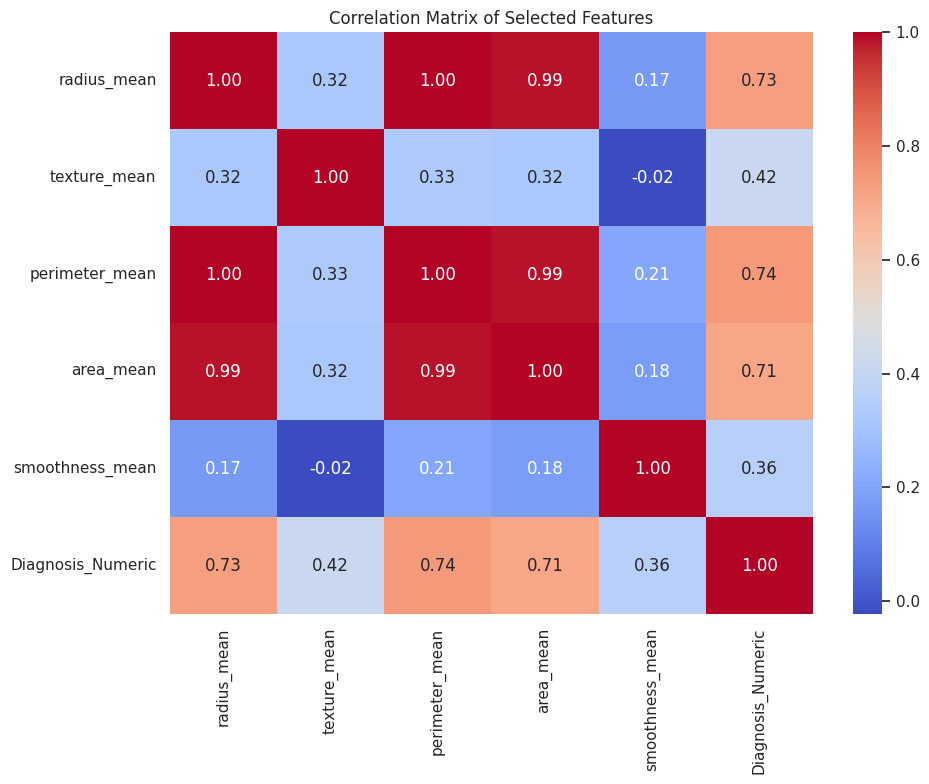

Explanation of Correlation Matrix:
The correlation matrix shows the relationship strength between variables.
Values range from -1 to 1:
  1: Perfect positive correlation (one increases, the other increases)
  0: No linear correlation (no clear linear relationship)
 -1: Perfect negative correlation (one increases, the other decreases)

Notice which features correlate most strongly with diagnosis.


In [21]:
# Convert diagnosis to numeric for correlation analysis
cancer_data['Diagnosis_Numeric'] = cancer_data['Diagnosis'].map({'M': 1, 'B': 0})

# Select features for visualization
visualization_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'Diagnosis_Numeric']

# Create a correlation matrix
correlation_matrix = cancer_data[visualization_features].corr()

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=visualization_features,
            yticklabels=visualization_features)
plt.title('Correlation Matrix of Selected Features')
plt.tight_layout()
plt.show()

print("Explanation of Correlation Matrix:")
print("The correlation matrix shows the relationship strength between variables.")
print("Values range from -1 to 1:")
print("  1: Perfect positive correlation (one increases, the other increases)")
print("  0: No linear correlation (no clear linear relationship)")
print(" -1: Perfect negative correlation (one increases, the other decreases)")
print("\nNotice which features correlate most strongly with diagnosis.")

<Figure size 1600x1200 with 0 Axes>

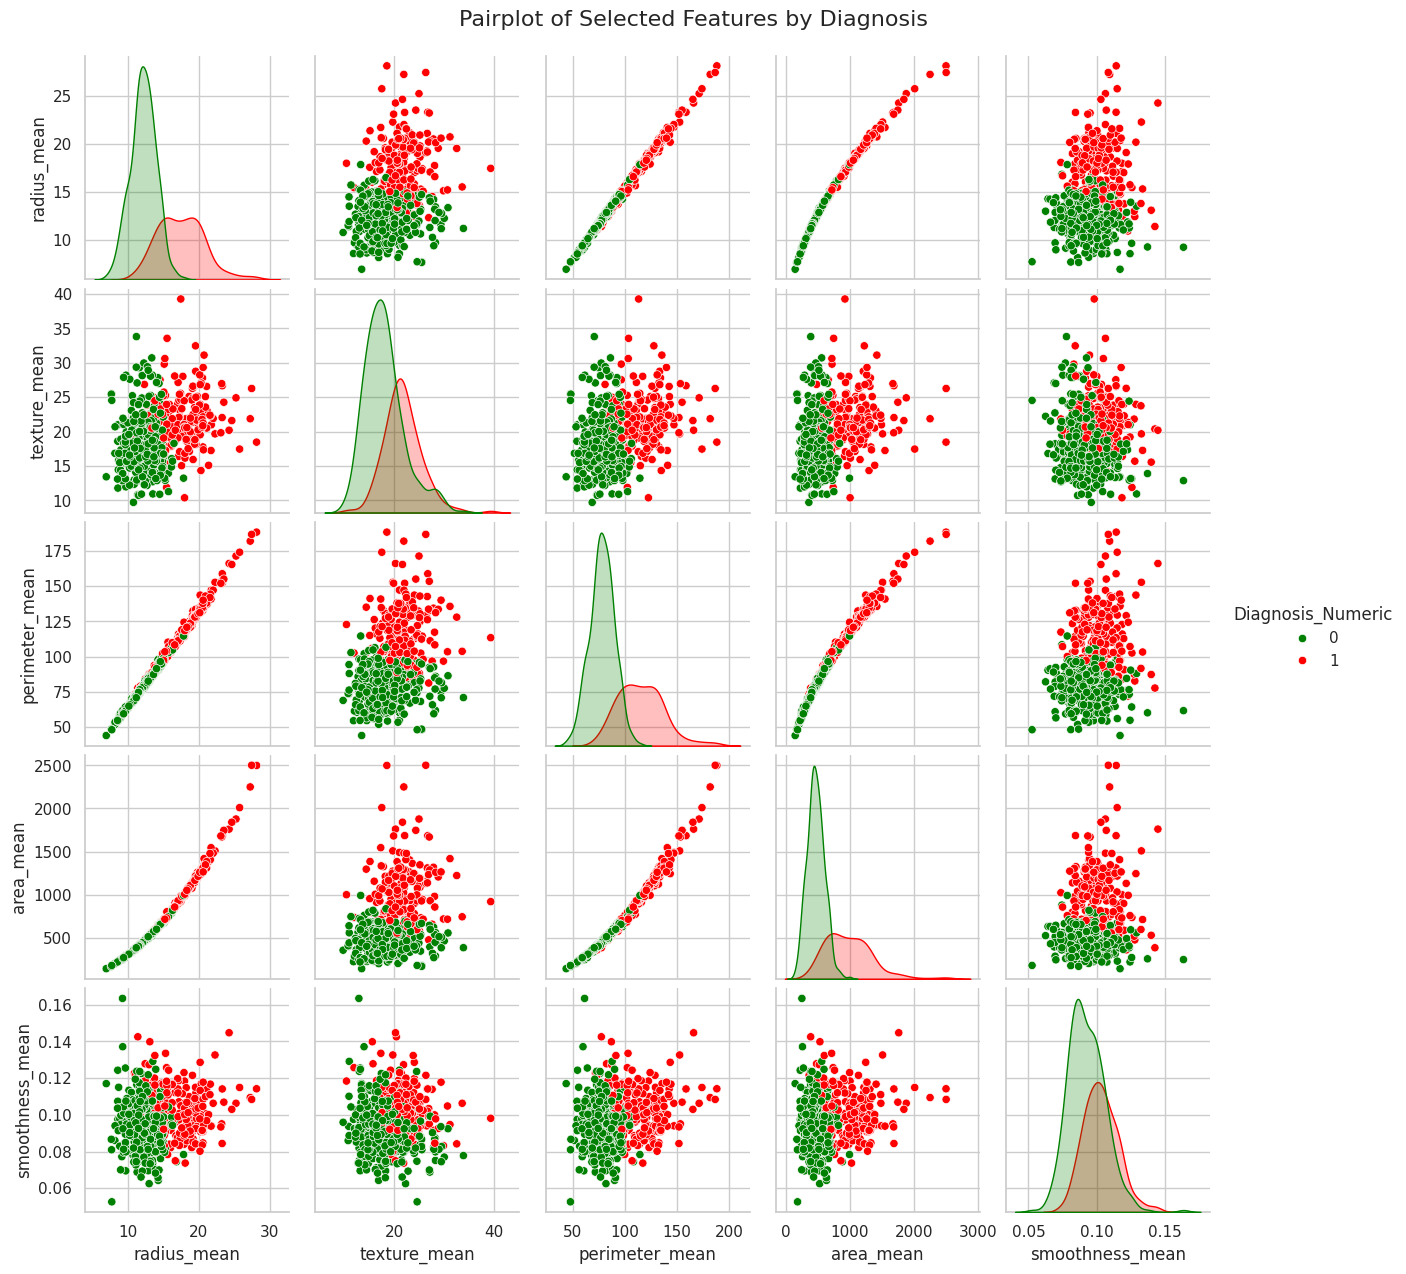

Explanation of Pairplot:
The pairplot shows relationships between pairs of variables and their distributions.
Diagonal plots show the distribution of each variable.
Off-diagonal plots show the relationship between two variables.
Points are colored by diagnosis (green for benign, red for malignant).
This helps identify potential patterns or clusters that differentiate between diagnoses.


In [22]:
# Create a pairplot to visualize relationships between features
plt.figure(figsize=(16, 12))
sns.pairplot(cancer_data[visualization_features],
             hue='Diagnosis_Numeric',
             palette={0: 'green', 1: 'red'},
             hue_order=[0, 1])
plt.suptitle('Pairplot of Selected Features by Diagnosis', y=1.02, fontsize=16)
plt.show()

print("Explanation of Pairplot:")
print("The pairplot shows relationships between pairs of variables and their distributions.")
print("Diagonal plots show the distribution of each variable.")
print("Off-diagonal plots show the relationship between two variables.")
print("Points are colored by diagnosis (green for benign, red for malignant).")
print("This helps identify potential patterns or clusters that differentiate between diagnoses.")

/tmp/ipython-input-2574765694.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=feature, data=cancer_data, palette={'M': 'red', 'B': 'blue'})
/tmp/ipython-input-2574765694.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=feature, data=cancer_data, palette={'M': 'red', 'B': 'blue'})
/tmp/ipython-input-2574765694.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=feature, data=cancer_data, palette={'M': 'red', 'B': 'blue'})
/tmp/ipython-input-2574765694.py:6: FutureWarning: 

Passing `pa

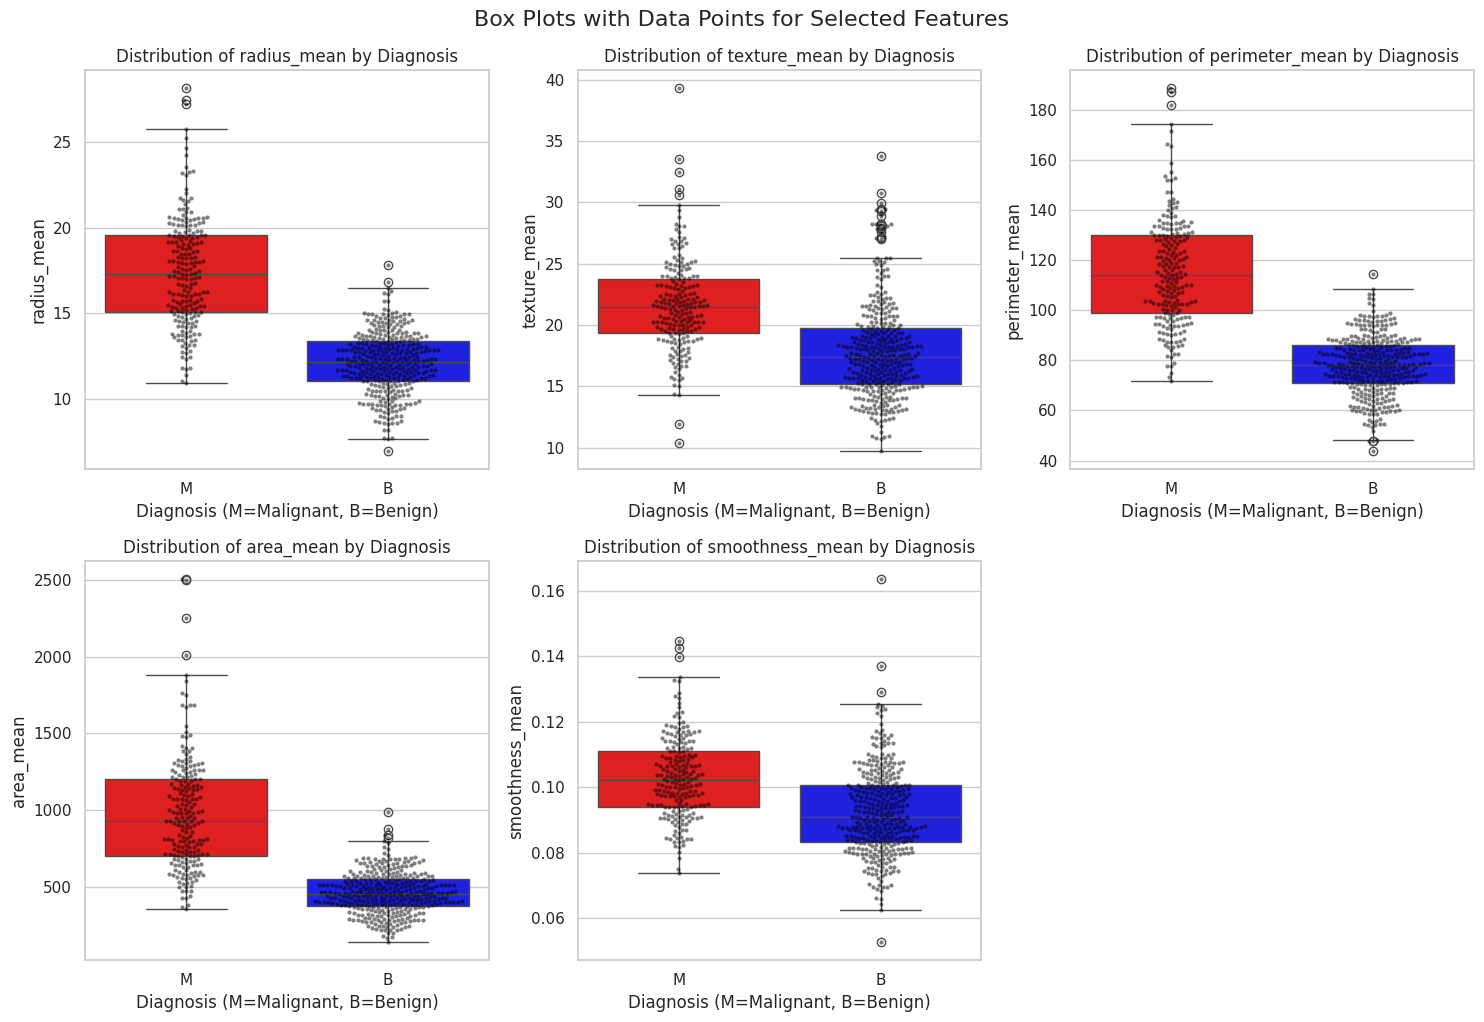

Explanation of Box Plots with Swarm Plots:
Box plots show the median (middle line), quartiles (box), and range (whiskers) of each group.
The overlaid points show the actual distribution of individual observations.
This combination helps visualize both the summary statistics and the full data distribution.
We can observe differences in both central tendency and dispersion between benign and malignant tumors.


In [23]:
# Advanced visualization: Box plots with swarm plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    # Combine boxplot and swarmplot for a richer visualization
    sns.boxplot(x='Diagnosis', y=feature, data=cancer_data, palette={'M': 'red', 'B': 'blue'})
    sns.swarmplot(x='Diagnosis', y=feature, data=cancer_data, color='black', alpha=0.5, size=3)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel('Diagnosis (M=Malignant, B=Benign)')
    plt.ylabel(feature)

plt.tight_layout()
plt.suptitle('Box Plots with Data Points for Selected Features', y=1.02, fontsize=16)
plt.show()

print("Explanation of Box Plots with Swarm Plots:")
print("Box plots show the median (middle line), quartiles (box), and range (whiskers) of each group.")
print("The overlaid points show the actual distribution of individual observations.")
print("This combination helps visualize both the summary statistics and the full data distribution.")
print("We can observe differences in both central tendency and dispersion between benign and malignant tumors.")

/tmp/ipython-input-445685156.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diagnosis', y=feature, data=cancer_data, palette={'M': 'red', 'B': 'blue'}, inner='quartile')
/tmp/ipython-input-445685156.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diagnosis', y=feature, data=cancer_data, palette={'M': 'red', 'B': 'blue'}, inner='quartile')
/tmp/ipython-input-445685156.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diagnosis', y=feature, data=cancer_data, palette={'M': 'red', 'B': 'blue'}, inner='quartile')
/tmp

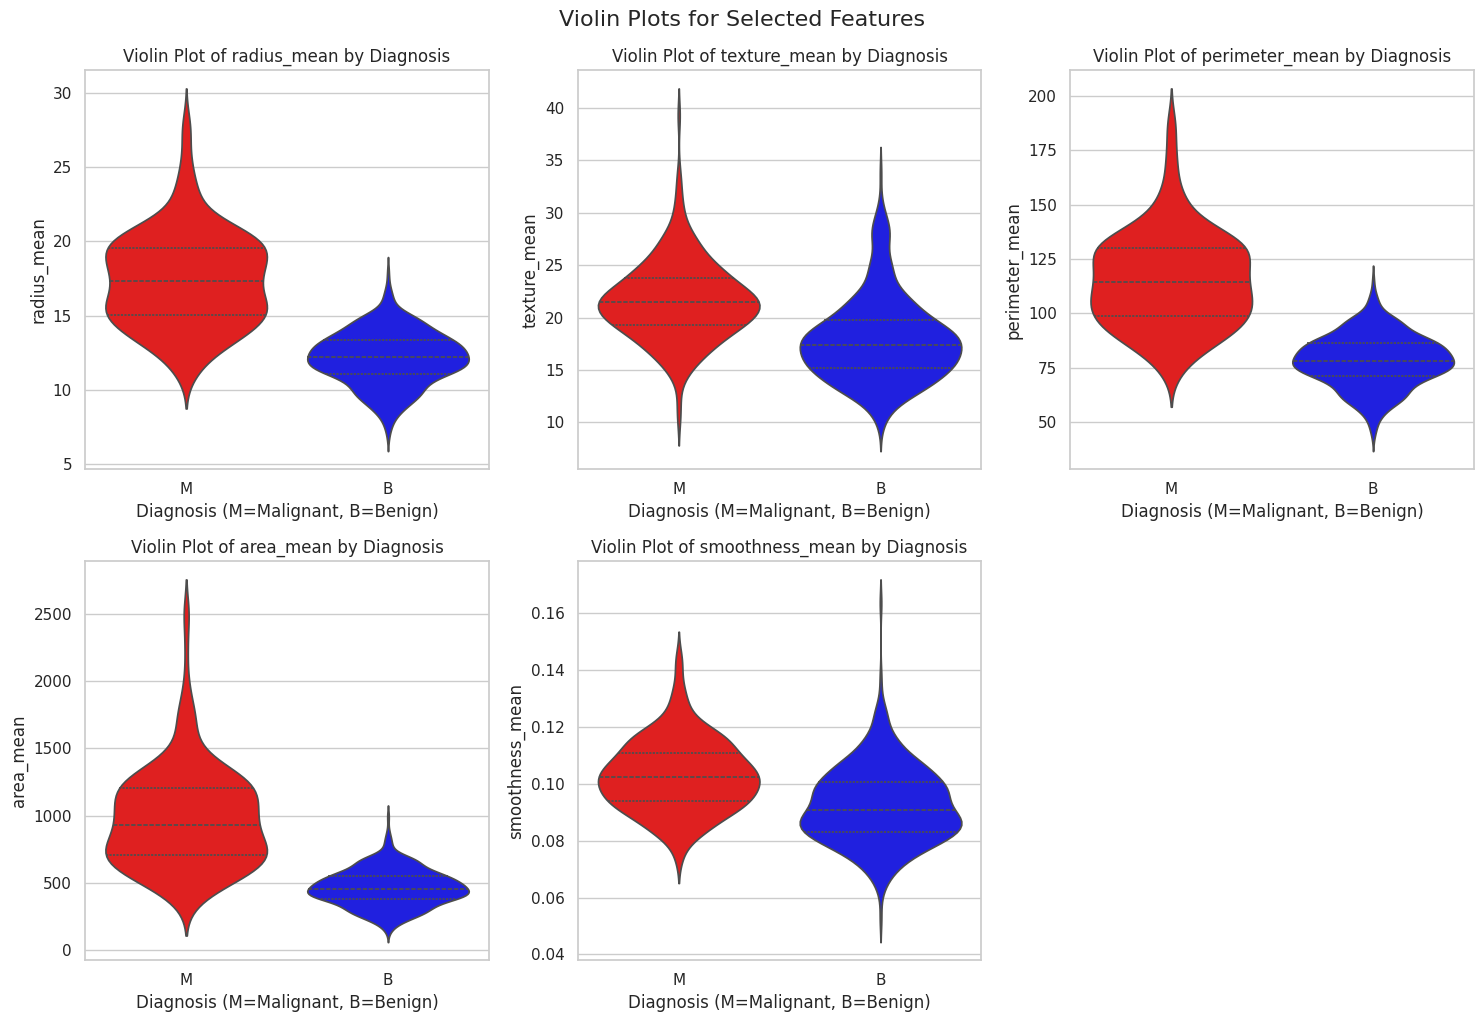

Explanation of Violin Plots:
Violin plots combine box plots with density plots to show the distribution shape.
Wider sections represent more frequent values, while narrower sections are less common.
The white dot represents the median, the black box shows the interquartile range.
These plots are excellent for comparing distributions between groups.
Note the different shapes, which reveal how values are distributed for each diagnosis group.


In [24]:
# Violin plots for comparing distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='Diagnosis', y=feature, data=cancer_data, palette={'M': 'red', 'B': 'blue'}, inner='quartile')
    plt.title(f'Violin Plot of {feature} by Diagnosis')
    plt.xlabel('Diagnosis (M=Malignant, B=Benign)')
    plt.ylabel(feature)

plt.tight_layout()
plt.suptitle('Violin Plots for Selected Features', y=1.02, fontsize=16)
plt.show()

print("Explanation of Violin Plots:")
print("Violin plots combine box plots with density plots to show the distribution shape.")
print("Wider sections represent more frequent values, while narrower sections are less common.")
print("The white dot represents the median, the black box shows the interquartile range.")
print("These plots are excellent for comparing distributions between groups.")
print("Note the different shapes, which reveal how values are distributed for each diagnosis group.")

#Statistical summary by group

In [25]:
# Group by diagnosis and calculate descriptive statistics
grouped_stats = cancer_data.groupby('Diagnosis')[numerical_features].describe()

print("Comprehensive Statistical Summary by Diagnosis:")
print(grouped_stats)

Comprehensive Statistical Summary by Diagnosis:
          radius_mean                                                      \
                count       mean       std     min     25%     50%    75%   
Diagnosis                                                                   
B               357.0  12.146524  1.780512   6.981  11.080  12.200  13.37   
M               212.0  17.462830  3.203971  10.950  15.075  17.325  19.59   

                 texture_mean             ... area_mean          \
             max        count       mean  ...       75%     max   
Diagnosis                                 ...                     
B          17.85        357.0  17.914762  ...    551.10   992.1   
M          28.11        212.0  21.604906  ...   1203.75  2501.0   

          smoothness_mean                                                 \
                    count      mean       std      min      25%      50%   
Diagnosis                                                                  
B 

In [26]:
summary_dict = {}

for feature in numerical_features:
    # Calculate stats for benign
    benign_stats = cancer_data[cancer_data['Diagnosis'] == 'B'][feature].agg(['mean', 'median', 'std', 'min', 'max']).to_dict()
    # Calculate stats for malignant
    malignant_stats = cancer_data[cancer_data['Diagnosis'] == 'M'][feature].agg(['mean', 'median', 'std', 'min', 'max']).to_dict()

    # Add prefixes to distinguish the groups
    benign_renamed = {f'Benign_{k}': v for k, v in benign_stats.items()}
    malignant_renamed = {f'Malignant_{k}': v for k, v in malignant_stats.items()}

    # Combine the stats
    summary_dict[feature] = {**benign_renamed, **malignant_renamed}

# Convert to dataframe
simple_stats = pd.DataFrame(summary_dict).T

print("\nSimplified Statistical Summary (Features as Columns):")
print(simple_stats)

print("\nKey Observations from Group Comparisons:")
for feature in numerical_features:
    b_mean = cancer_data[cancer_data['Diagnosis'] == 'B'][feature].mean()
    m_mean = cancer_data[cancer_data['Diagnosis'] == 'M'][feature].mean()

    percent_diff = abs((m_mean - b_mean) / b_mean) * 100

    if m_mean > b_mean:
        comparison = "higher"
    else:
        comparison = "lower"

    print(f"For {feature}, malignant tumors have {comparison} values (by {percent_diff:.1f}%) than benign tumors.")


Simplified Statistical Summary (Features as Columns):
                 Benign_mean  Benign_median  Benign_std  Benign_min  \
radius_mean        12.146524       12.20000    1.780512     6.98100   
texture_mean       17.914762       17.39000    3.995125     9.71000   
perimeter_mean     78.075406       78.18000   11.807438    43.79000   
area_mean         462.790196      458.40000  134.287118   143.50000   
smoothness_mean     0.092478        0.09076    0.013446     0.05263   

                 Benign_max  Malignant_mean  Malignant_median  Malignant_std  \
radius_mean         17.8500       17.462830           17.3250       3.203971   
texture_mean        33.8100       21.604906           21.4600       3.779470   
perimeter_mean     114.6000      115.365377          114.2000      21.854653   
area_mean          992.1000      978.376415          932.0000     367.937978   
smoothness_mean      0.1634        0.102898            0.1022       0.012608   

                 Malignant_min  Malig

#Non Normal Data and Outliers

In [27]:
# Function to check for normality visually and with Shapiro-Wilk test
def check_normality(data, column):
    """Check if data follows a normal distribution using QQ-plot and Shapiro-Wilk test."""
    values = data[column]

    # Create a figure with QQ-plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    stats.probplot(values, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column}')

    plt.subplot(1, 2, 2)
    sns.histplot(values, kde=True)
    plt.title(f'Distribution of {column}')

    plt.tight_layout()
    plt.show()

    # Perform Shapiro-Wilk test for normality
    statistic, p_value = stats.shapiro(values)

    print(f"Normality check for {column}:")
    print(f"Shapiro-Wilk test: statistic = {statistic:.4f}, p-value = {p_value:.8f}")

    if p_value < 0.05:
        print("The data significantly deviates from a normal distribution (p < 0.05).")
    else:
        print("The data appears to follow a normal distribution (p >= 0.05).")

    # Calculate skewness and kurtosis
    skewness = stats.skew(values)
    kurtosis = stats.kurtosis(values)

    print(f"Skewness: {skewness:.4f}")
    if abs(skewness) < 0.5:
        print("  The distribution is approximately symmetric.")
    elif skewness > 0.5:
        print("  The distribution is right-skewed (positively skewed).")
    else:  # skewness < -0.5
        print("  The distribution is left-skewed (negatively skewed).")

    print(f"Kurtosis: {kurtosis:.4f}")
    if abs(kurtosis) < 0.5:
        print("  The distribution has a similar tail weight as the normal distribution.")
    elif kurtosis > 0.5:
        print("  The distribution is leptokurtic (heavier tails, more outliers than normal).")
    else:  # kurtosis < -0.5
        print("  The distribution is platykurtic (lighter tails, fewer outliers than normal).")
    print("\n")

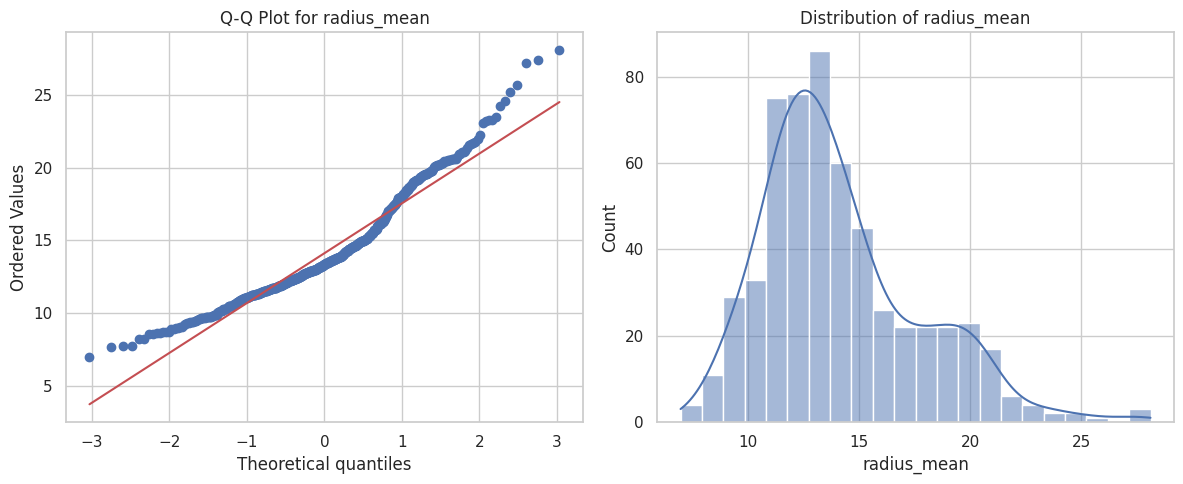

Normality check for radius_mean:
Shapiro-Wilk test: statistic = 0.9411, p-value = 0.00000000
The data significantly deviates from a normal distribution (p < 0.05).
Skewness: 0.9399
  The distribution is right-skewed (positively skewed).
Kurtosis: 0.8276
  The distribution is leptokurtic (heavier tails, more outliers than normal).




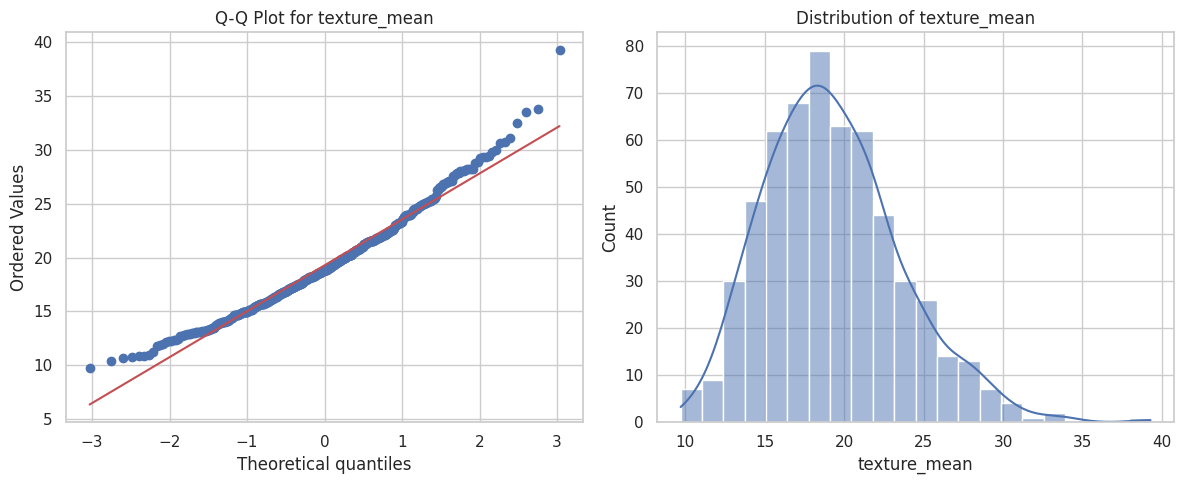

Normality check for texture_mean:
Shapiro-Wilk test: statistic = 0.9767, p-value = 0.00000007
The data significantly deviates from a normal distribution (p < 0.05).
Skewness: 0.6487
  The distribution is right-skewed (positively skewed).
Kurtosis: 0.7411
  The distribution is leptokurtic (heavier tails, more outliers than normal).




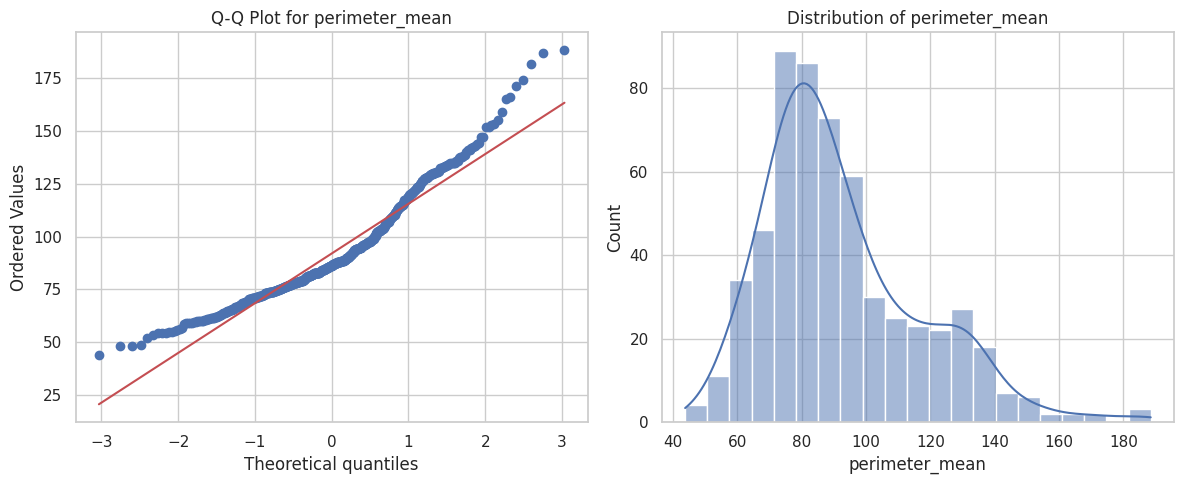

Normality check for perimeter_mean:
Shapiro-Wilk test: statistic = 0.9362, p-value = 0.00000000
The data significantly deviates from a normal distribution (p < 0.05).
Skewness: 0.9880
  The distribution is right-skewed (positively skewed).
Kurtosis: 0.9532
  The distribution is leptokurtic (heavier tails, more outliers than normal).




In [28]:
# Check normality for the first 3 features
for feature in numerical_features[:3]:
    check_normality(cancer_data, feature)

In [29]:
# Outlier detection and visualization
def detect_outliers(data, column):
    """Detect and visualize outliers using the IQR method."""
    values = data[column]

    # Calculate Q1, Q3, and IQR
    q1 = values.quantile(0.25)
    q3 = values.quantile(0.75)
    iqr = q3 - q1

    # Define outlier boundaries
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Find outliers
    outliers = values[(values < lower_bound) | (values > upper_bound)]

    print(f"Outlier detection for {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers) / len(values)) * 100:.2f}%")
    print(f"Outlier boundaries: Lower = {lower_bound:.4f}, Upper = {upper_bound:.4f}")

    if len(outliers) > 0:
        print("Outlier values:")
        print(outliers.values)

    # Visualize with box plot
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=values)
    plt.title(f'Box Plot of {column} Showing Outliers')
    plt.ylabel('Value')

    plt.subplot(1, 2, 2)
    sns.histplot(values, kde=True)
    plt.axvline(lower_bound, color='r', linestyle='--', label=f'Lower bound: {lower_bound:.2f}')
    plt.axvline(upper_bound, color='r', linestyle='--', label=f'Upper bound: {upper_bound:.2f}')
    plt.title(f'Distribution of {column} with Outlier Boundaries')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Return the outliers
    return outliers

Outlier detection for radius_mean:
Number of outliers: 14
Percentage of outliers: 2.46%
Outlier boundaries: Lower = 5.5800, Upper = 21.9000
Outlier values:
[25.22 22.27 24.25 23.27 27.22 23.29 28.11 23.21 23.51 25.73 22.01 27.42
 23.09 24.63]


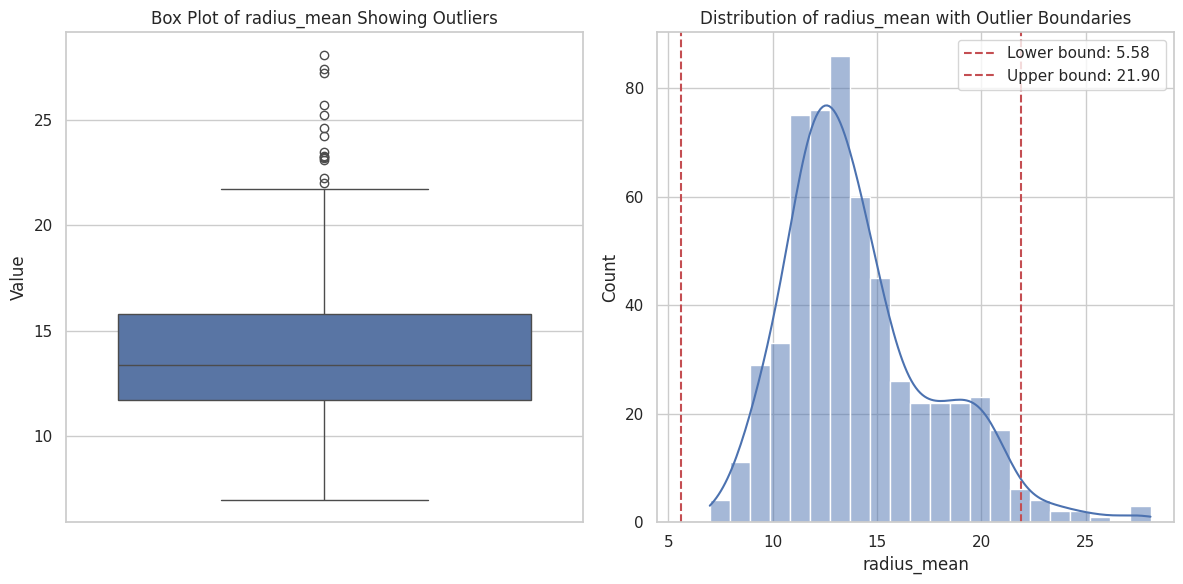

Outlier detection for texture_mean:
Number of outliers: 7
Percentage of outliers: 1.23%
Outlier boundaries: Lower = 7.7250, Upper = 30.2450
Outlier values:
[32.47 33.81 39.28 33.56 31.12 30.72 30.62]


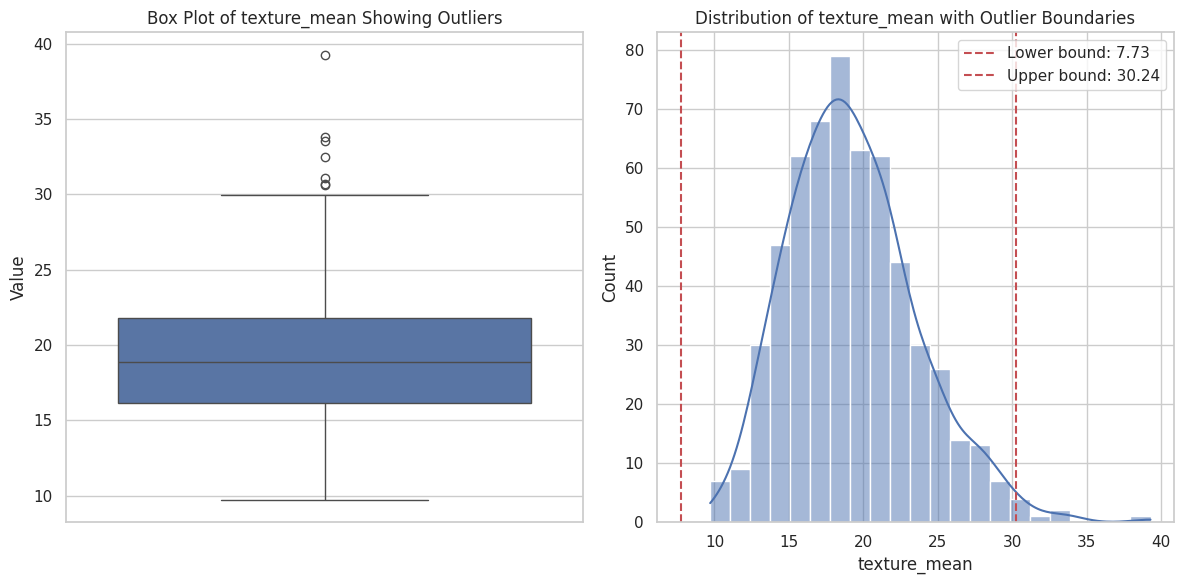

Outlier detection for perimeter_mean:
Number of outliers: 13
Percentage of outliers: 2.28%
Outlier boundaries: Lower = 31.7750, Upper = 147.4950
Outlier values:
[171.5 152.8 166.2 152.1 182.1 158.9 188.5 153.5 155.1 174.2 186.9 152.1
 165.5]


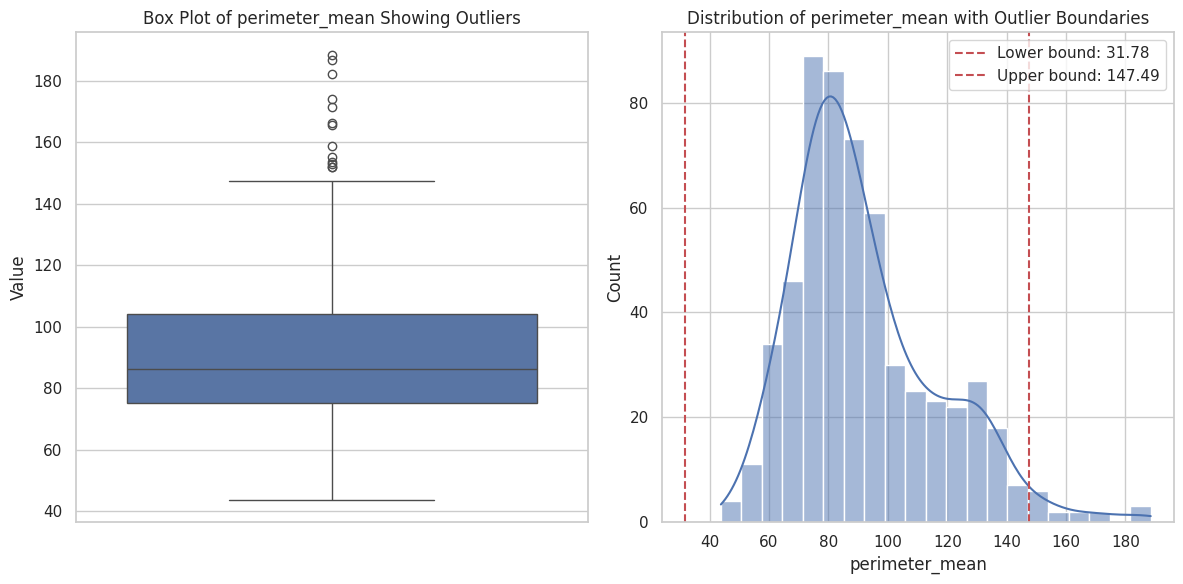

Outlier detection for area_mean:
Number of outliers: 25
Percentage of outliers: 4.39%
Outlier boundaries: Lower = -123.3000, Upper = 1326.3000
Outlier values:
[1404. 1878. 1509. 1761. 1686. 2250. 1685. 2499. 1670. 1364. 1419. 1491.
 1747. 2010. 1546. 1482. 1386. 1335. 1407. 1384. 2501. 1682. 1841. 1347.
 1479.]


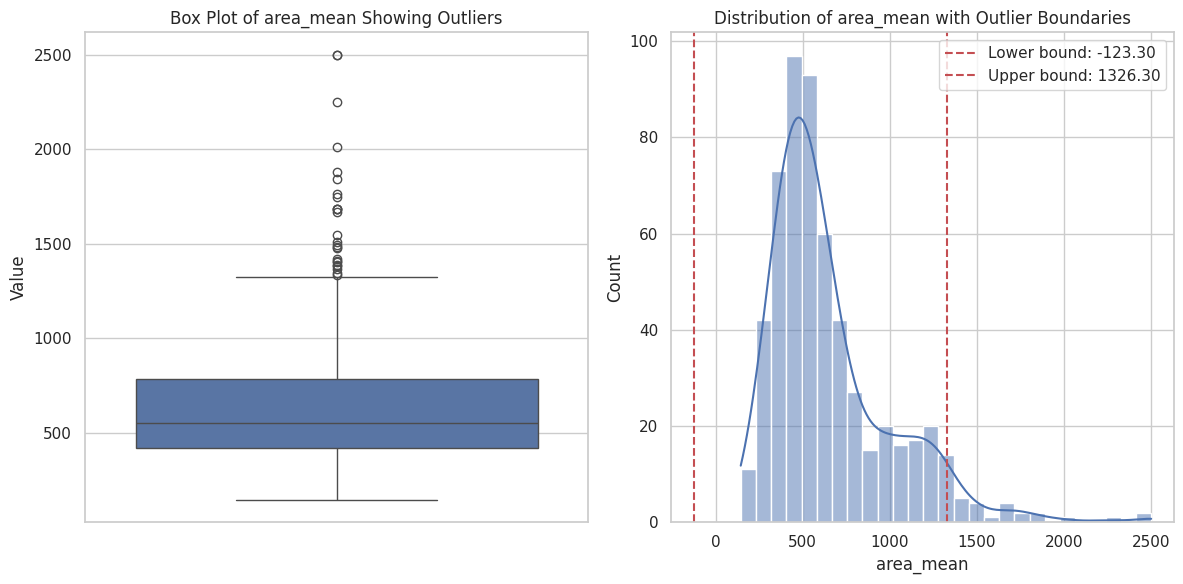

Outlier detection for smoothness_mean:
Number of outliers: 6
Percentage of outliers: 1.05%
Outlier boundaries: Lower = 0.0580, Upper = 0.1337
Outlier values:
[0.1425  0.1398  0.1447  0.1634  0.1371  0.05263]


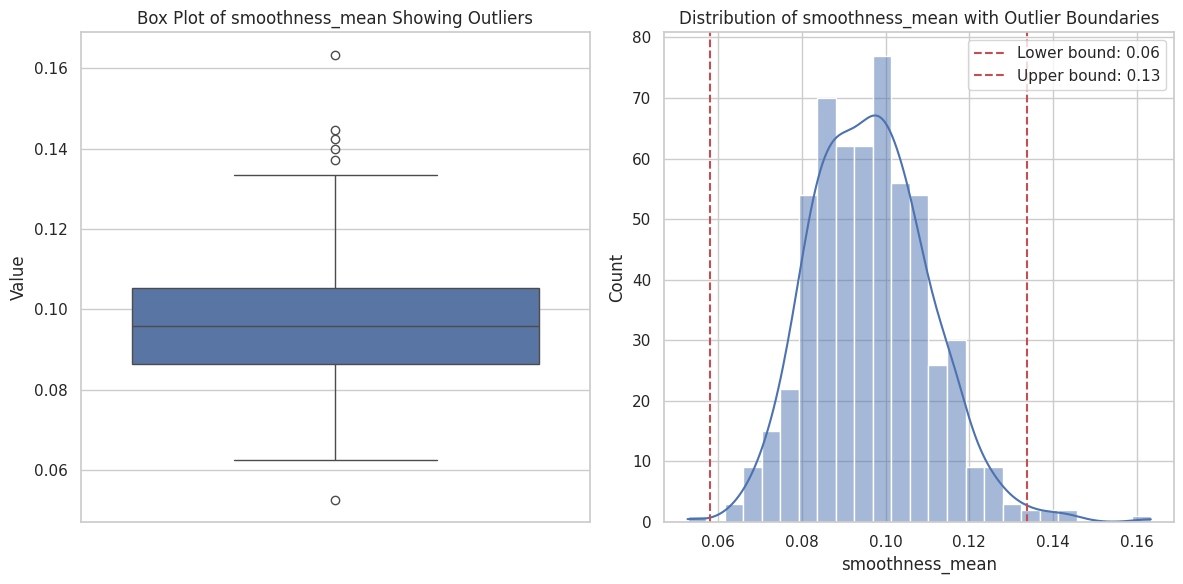

In [30]:
# Detect outliers for each feature
for feature in numerical_features:
    outliers = detect_outliers(cancer_data, feature)